01 — Exploratory Data Analysis (PlantVillage Dataset)

This notebook explores the PlantVillage dataset, checks class distributions, visualizes sample images, and performs basic data integrity checks.
These steps help build intuition before training any machine learning models.

In [13]:
import os # navigate folders
import numpy as np # basic array handling
import matplotlib.pyplot as plt #image plotting
import cv2 #read images
from collections import Counter #count images per class
from PIL import Image
import torch

In [14]:
train_dir = "../data/PlantVillage/train"
val_dir = "../data/PlantVillage/val"

print("Train directory: ", train_dir)
print("Val directory: ", val_dir)

Train directory:  ../data/PlantVillage/train
Val directory:  ../data/PlantVillage/val


In [15]:
# each is a folder name e.g. Apple__Black_rot
# plant disease categories

classes = sorted(os.listdir(train_dir))
print("Number of classes: ", len(classes))
classes #display the class names

Number of classes:  38


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [16]:
#count images per class in the training folder

class_counts = {}

for cls in classes:
  class_path = os.path.join(train_dir, cls)
  num_images = len(os.listdir(class_path))
  class_counts[cls] = num_images

class_counts

{'Apple___Apple_scab': 504,
 'Apple___Black_rot': 496,
 'Apple___Cedar_apple_rust': 220,
 'Apple___healthy': 1316,
 'Blueberry___healthy': 1202,
 'Cherry_(including_sour)___Powdery_mildew': 842,
 'Cherry_(including_sour)___healthy': 684,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 410,
 'Corn_(maize)___Common_rust_': 953,
 'Corn_(maize)___Northern_Leaf_Blight': 788,
 'Corn_(maize)___healthy': 929,
 'Grape___Black_rot': 944,
 'Grape___Esca_(Black_Measles)': 1107,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 861,
 'Grape___healthy': 339,
 'Orange___Haunglongbing_(Citrus_greening)': 4405,
 'Peach___Bacterial_spot': 1838,
 'Peach___healthy': 288,
 'Pepper,_bell___Bacterial_spot': 797,
 'Pepper,_bell___healthy': 1183,
 'Potato___Early_blight': 800,
 'Potato___Late_blight': 800,
 'Potato___healthy': 121,
 'Raspberry___healthy': 297,
 'Soybean___healthy': 4072,
 'Squash___Powdery_mildew': 1468,
 'Strawberry___Leaf_scorch': 887,
 'Strawberry___healthy': 364,
 'Tomato___Bacterial_s

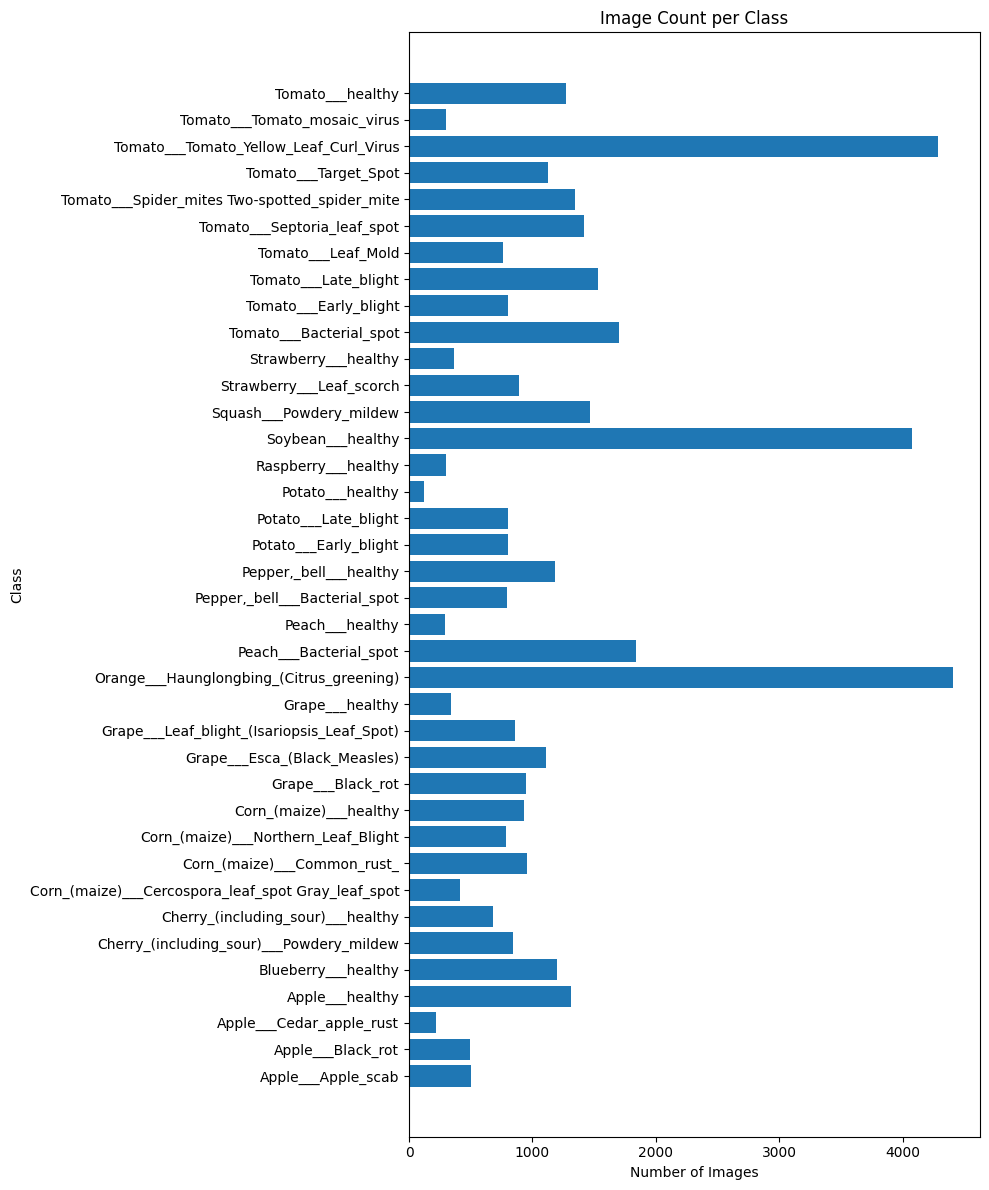

In [17]:
# convert counts into bar chart

plt.figure(figsize=(10,12)) #(width, height)
plt.barh(list(class_counts.keys()), list(class_counts.values()))
plt.title("Image Count per Class")
plt.xlabel("Number of Images")
plt.ylabel("Class")
plt.tight_layout()
plt.show()

In [18]:
#function to display 'n' sample images from given class

def show_sample(class_name, n=5): #default 5
  class_path = os.path.join(train_dir, class_name)
  image_files = os.listdir(class_path)[:n] #take n first images

  plt.figure(figsize=(15,3))

  for i, img_name in enumerate(image_files): #adds counter to each item in list
    img_path = os.path.join(class_path, img_name) #creates path for each img in list

    img = Image.open(img_path) #open image

    #display it
    plt.subplot(1,n,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(class_name)

  plt.show()


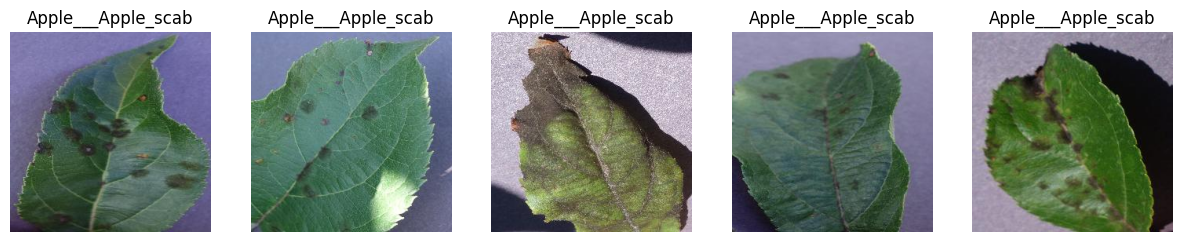

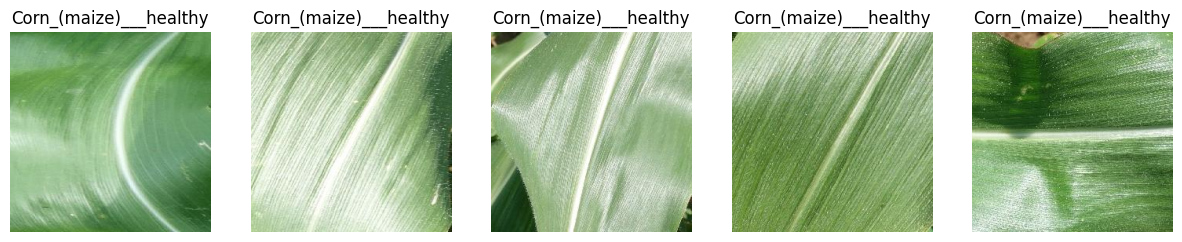

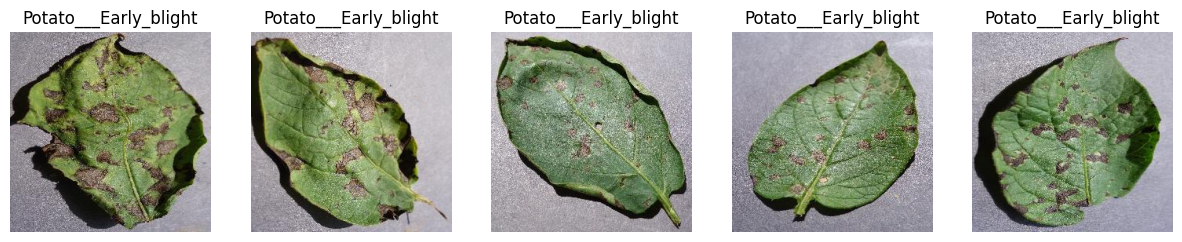

In [22]:
#display some samples

show_sample(classes[0], n=5) #apple
show_sample(classes[10], n=5) #corn
show_sample(classes[20], n=5) #potato

Image shape: (256, 256, 3)


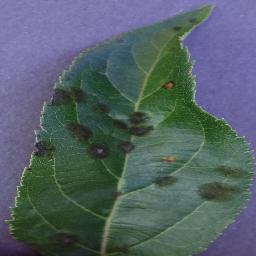

In [23]:
#inspect image size and shape -> determines what input size neural network expects

sample_class = classes[0]
sample_image_path = os.path.join(
  train_dir, 
  sample_class, #go inside the chosen class folder
  os.listdir(os.path.join(train_dir, sample_class))[0] #get list of ALL images in that class
) 

img = Image.open(sample_image_path)
img_array = np.array(img)

print("Image shape:", img_array.shape)
img